# Decision Tree (Play Tennis Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether a personis going to play tennis or not, using the Decision Tree algorithm.

### Column Descriptions

- ***Outlook*** = Describes the general weather condition for the day. Possible values are Sunny, Overcast, and Rain.
- ***Temperature*** = Indicates the temperature level of the day. Possible values are Hot, Mild, and Cool.
- ***Humidity*** = Represents the humidity level in the atmosphere. Possible values are High or Normal.
- ***Wind*** = Describes the wind strength on the day. Possible values are Weak or Strong.
- ***PlayTennis*** = Target variable indicating whether tennis was played on that day. Possible values are Yes or No.

## A. Data Preparation

### A.1 Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [23]:
try:
    df = pd.read_csv("playtennis.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [24]:
df.shape

(200, 5)

### A.4 Viewing Data Informations

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      200 non-null    object
 1   Temperature  200 non-null    object
 2   Humidity     191 non-null    object
 3   Wind         190 non-null    object
 4   PlayTennis   200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


### A.5 Viewing Data Statistics

In [26]:
# df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

### A.6 Viewing Top 5 Data and Bottom 5 Data

In [27]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Overcast,Mild,Normal,Strong,No
2,Overcast,Cool,Normal,NaN,Yes
3,Rain,Mild,High,Strong,No
4,Rain,Hot,Normal,Weak,Yes


In [28]:
df.tail()

,Outlook,Temperature,Humidity,Wind,PlayTennis
195,Rain,Mild,High,Weak,Yes
196,Overcast,Hot,High,Strong,Yes
197,Sunny,Mild,Normal,Strong,Yes
198,Rain,Mild,High,Weak,Yes
199,Rain,Cool,High,Weak,No


### A.7 Viewing Duplicated Data

In [29]:
df.duplicated().sum()

np.int64(141)

#### Not Removing Duplicated Data Because It Is Too Much and DecTree Model need to understand the Data Pattern

### A.8 Viewing Missing Data

In [30]:
df.isna().sum()

Outlook         0
Temperature     0
Humidity        9
Wind           10
PlayTennis      0
dtype: int64

In [31]:
nan_cols = ['Humidity', 'Wind']

for col in nan_cols:
    modus = df[col].mode()[0]
    df[col].fillna(modus, inplace=True)

C:\Users\nahls\AppData\Local\Temp\ipykernel_14288\719654839.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(modus, inplace=True)


In [32]:
df.isna().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
PlayTennis     0
dtype: int64

### A.9 Viewing Outlier Data

#### No Outlier Because The Data Is Categorical

## B. Data Preprocessing

### B.1 Mapping Feature

In [33]:
outlook_map = {'Sunny': 0, 'Overcast': 1, 'Rain': 2}
temperature_map    = {'Hot': 0, 'Mild': 1, 'Cool': 2}
humidity_map   = {'High': 0, 'Normal': 1}
wind_map    = {'Weak': 0, 'Strong': 1}

df['Outlook_Sign'] = df['Outlook'].map(outlook_map)
df['Temperature_Sign'] = df['Temperature'].map(temperature_map)
df['Humidity_Sign'] = df['Humidity'].map(humidity_map)
df['Wind_Sign'] = df['Wind'].map(wind_map)

In [34]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis,Outlook_Sign,Temperature_Sign,Humidity_Sign,Wind_Sign
0,Sunny,Hot,High,Weak,No,0,0,0,0
1,Overcast,Mild,Normal,Strong,No,1,1,1,1
2,Overcast,Cool,Normal,Weak,Yes,1,2,1,0
3,Rain,Mild,High,Strong,No,2,1,0,1
4,Rain,Hot,Normal,Weak,Yes,2,0,1,0


### B.2 Mapping Label

In [35]:
target_map  = {'No': 0, 'Yes': 1}

df['PlayTennis_Sign'] = df['PlayTennis'].map(target_map)

In [36]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis,Outlook_Sign,Temperature_Sign,Humidity_Sign,Wind_Sign,PlayTennis_Sign
0,Sunny,Hot,High,Weak,No,0,0,0,0,0
1,Overcast,Mild,Normal,Strong,No,1,1,1,1,0
2,Overcast,Cool,Normal,Weak,Yes,1,2,1,0,1
3,Rain,Mild,High,Strong,No,2,1,0,1,0
4,Rain,Hot,Normal,Weak,Yes,2,0,1,0,1


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Label Distributions

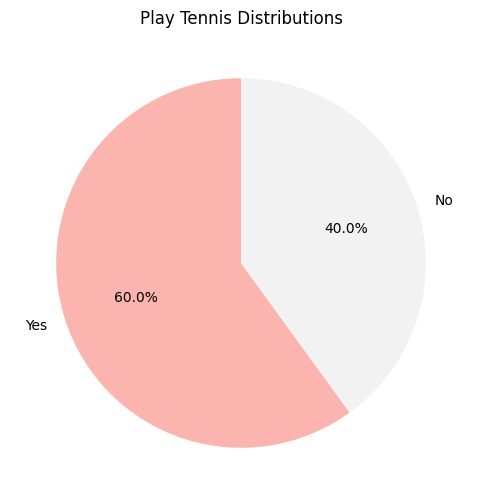

In [40]:
plt.figure(figsize=(6, 6))
df['PlayTennis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Play Tennis Distributions')
plt.ylabel(None)
plt.show()

#### Feature Distributions

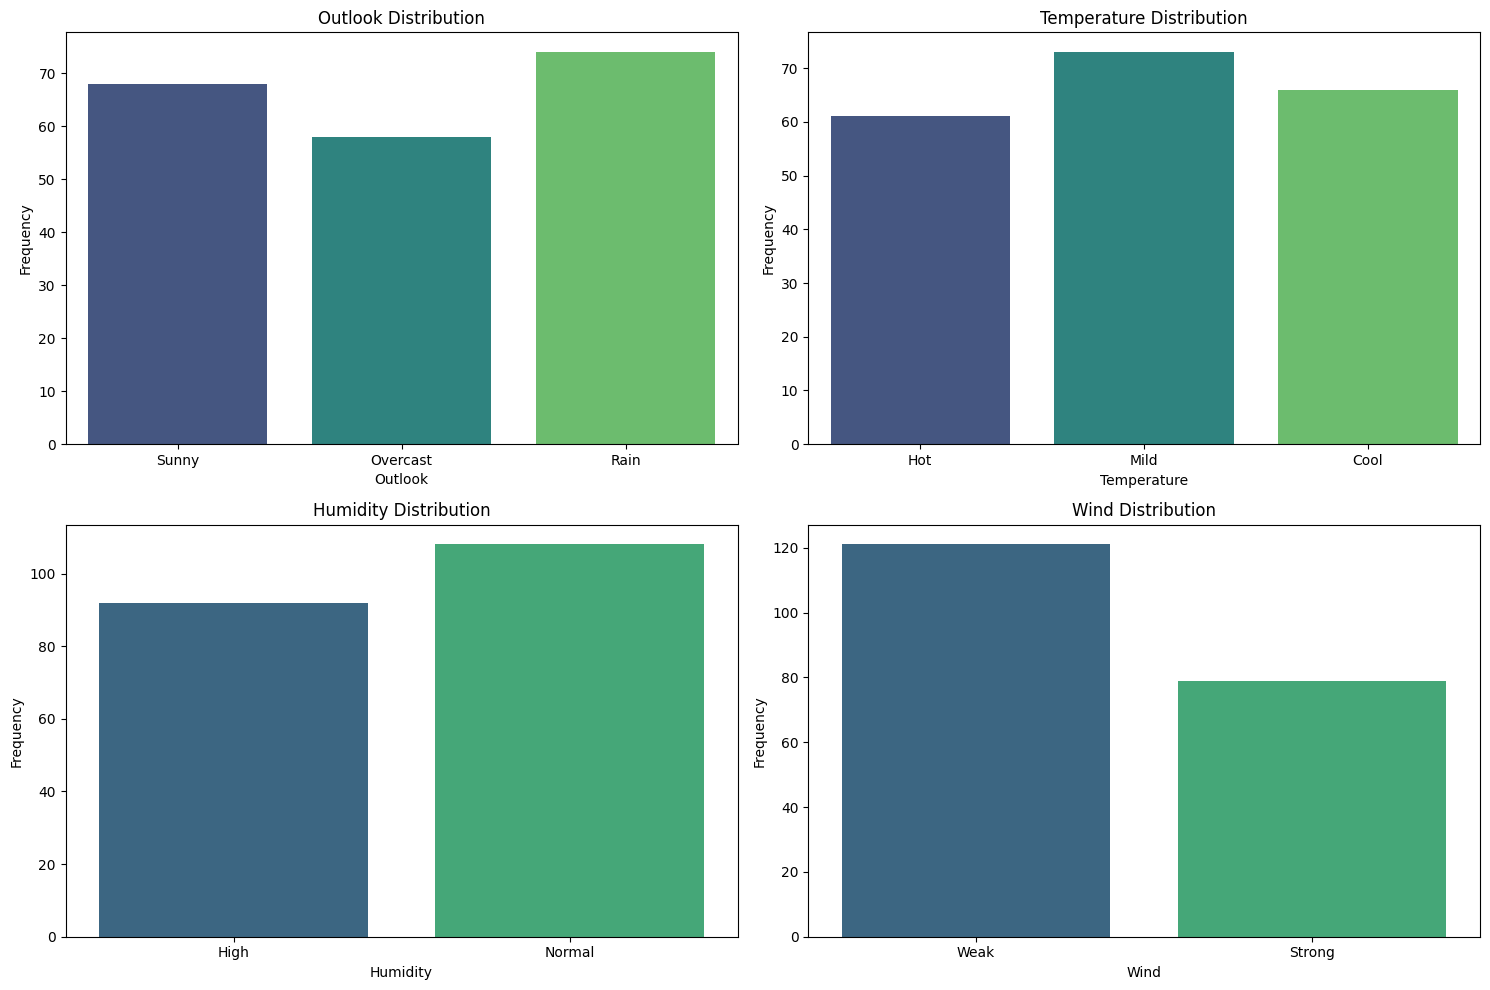

In [38]:
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, hue=col, legend=False, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

#### Every Feature Influence On Label

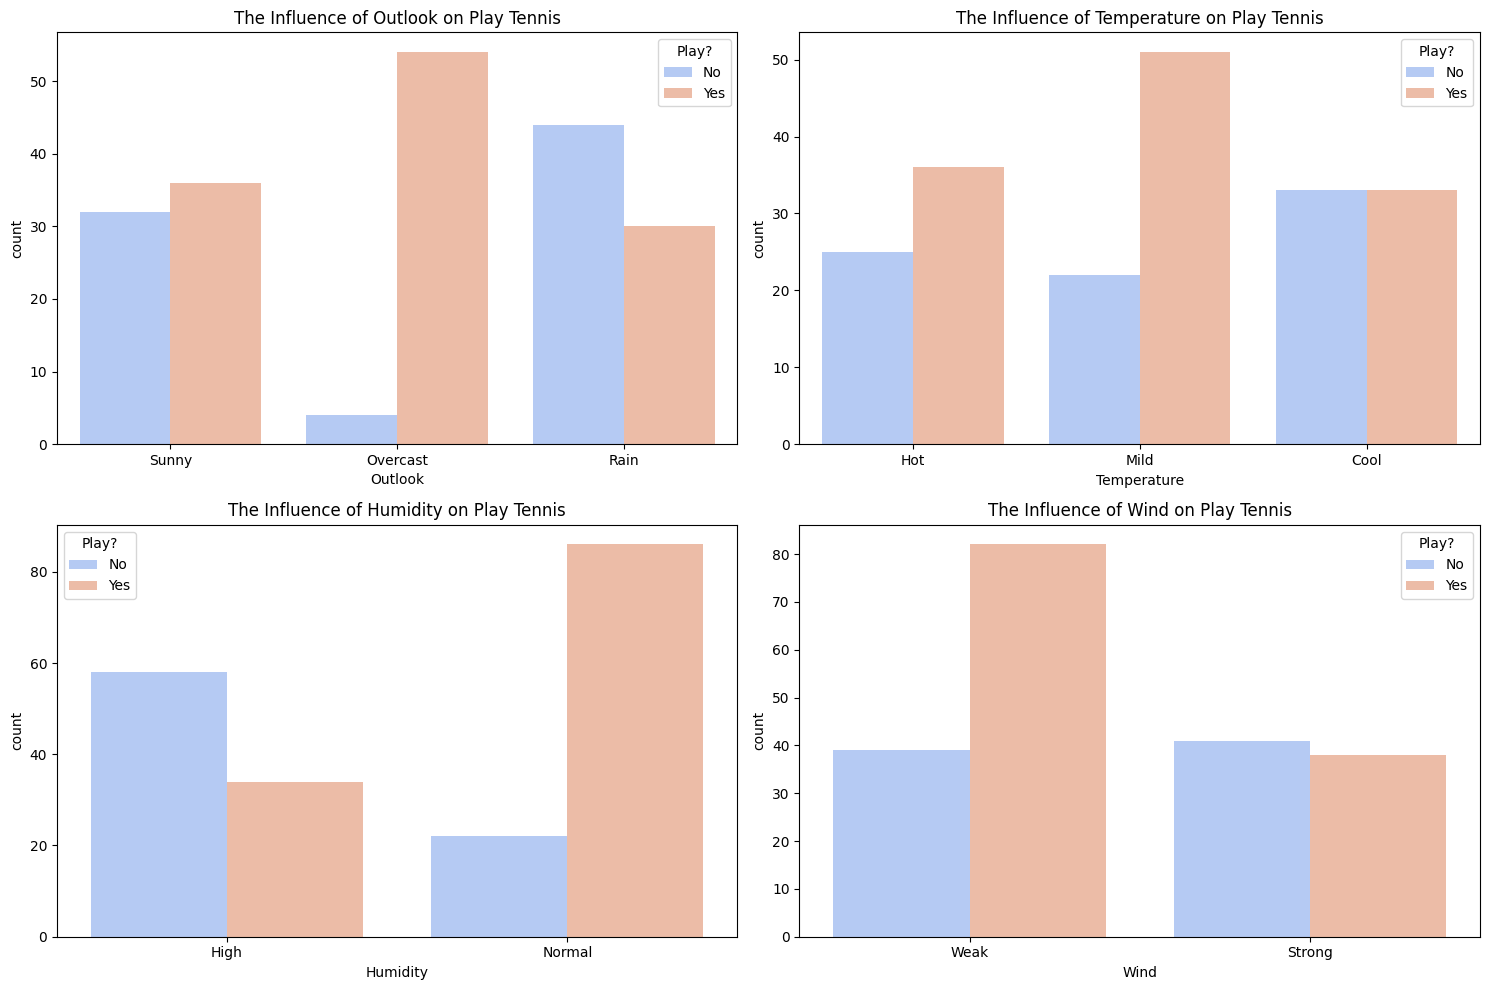

In [41]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='PlayTennis', data=df, palette='coolwarm')
    plt.title(f'The Influence of {col} on Play Tennis')
    plt.legend(title='Play?')

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

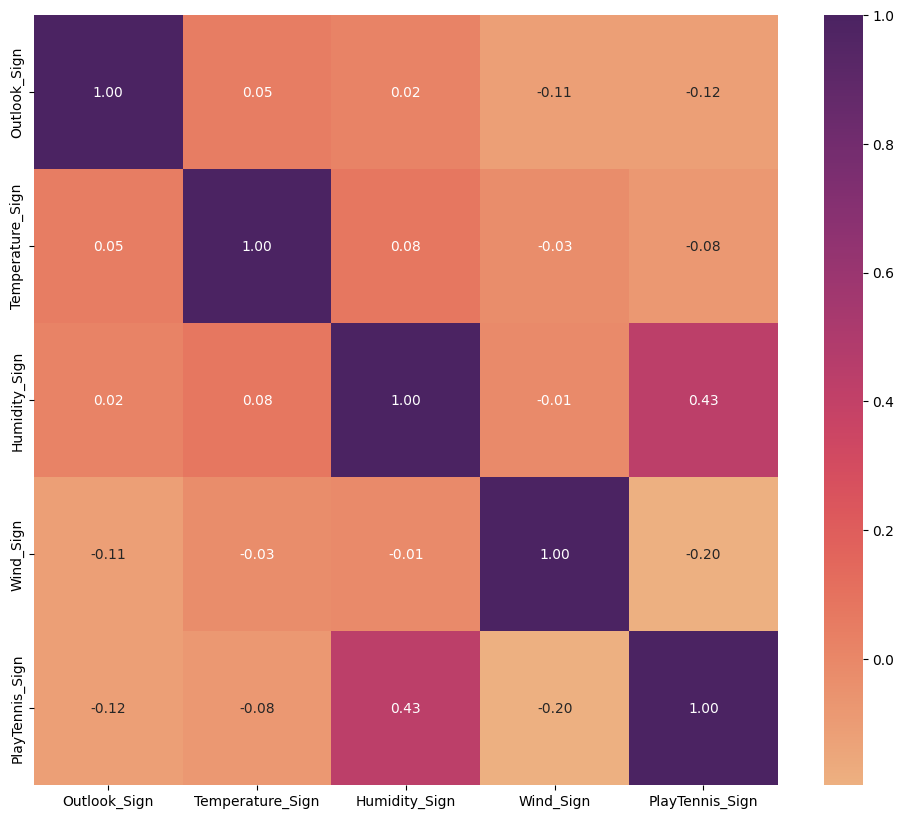

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [46]:
X_data = df.select_dtypes(include='number').drop(columns=['PlayTennis_Sign'])
y_data = df['PlayTennis_Sign']

### D.2 Splitting Train Data and Test Data (80:20)

In [47]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Decision Tree

In [48]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None, prob=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.prob = prob

class DecisionTreeID3:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping Criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            # Hitung Probabilitas (Jumlah Class 1 / Total Data di Node ini)
            prob = np.mean(y == 1) if len(y) > 0 else 0
            return Node(value=leaf_value, prob=prob)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, feat_idxs)
        
        if best_feat is None: # Kalau ga bisa split lagi
            leaf_value = self._most_common_label(y)
            prob = np.mean(y == 1)
            return Node(value=leaf_value, prob=prob)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thr
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0: return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        return parent_entropy - child_entropy

    def _split(self, X_column, split_thresh):
        # Karena data PlayTennis kategorikal (0,1,2), kita pakai equality biasannya
        # Tapi biar umum, kita pakai <= (works for logic 0, 1 too)
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0: return 0
        return np.bincount(y).argmax()

    def predict_proba(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree_prob(x, self.root) for x in X])

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)

    def _traverse_tree_prob(self, x, node):
        if node.value is not None: return node.prob
        if x[node.feature] <= node.threshold:
            return self._traverse_tree_prob(x, node.left)
        return self._traverse_tree_prob(x, node.right)

### D.4 Validation Curve (Finding Best Gap)

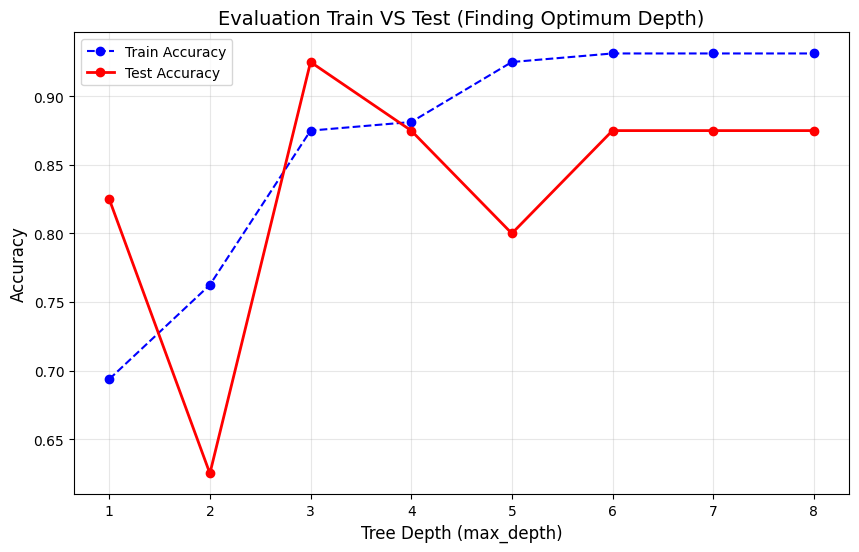

Best Test Accuracy is at Depth: 3


In [ ]:
# --- 1. Validation Curve Logic ---
train_accuracies = []
test_accuracies = []

# tune 'max_depth' for Decision Tree
depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

for d in depth_values:
    # Initialize ID3 Model
    model = DecisionTreeID3(max_depth=d) 
    model.fit(X_train, y_train)
    
    # Train Accuracy
    train_pred = model.predict(X_train)
    train_acc = np.mean(train_pred == y_train)
    train_accuracies.append(train_acc)
    
    # Test Accuracy
    test_pred = model.predict(X_test)
    test_acc = np.mean(test_pred == y_test)
    test_accuracies.append(test_acc)
    
    
# --- 2. Visualization ---
plt.figure(figsize=(10, 6))

plt.plot(depth_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.plot(depth_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Evaluation Train VS Test (Finding Optimum Depth)', fontsize=14)
plt.xlabel('Tree Depth (max_depth)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(depth_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best Test Accuracy is at Depth: {depth_values[np.argmax(test_accuracies)]}")

## E. Evaluation

### E.6 ROC-AUC Visualization

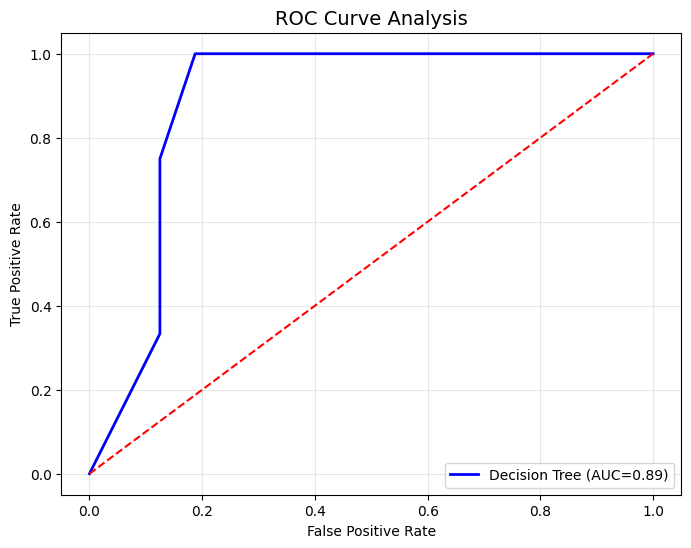

In [50]:
# --- 1. Get Probabilities Function ---
def get_probabilities(model, X_test):
    return model.predict_proba(X_test)

# --- 2. Main Logic: Calc ROC Curve ---
best_model = DecisionTreeID3(max_depth=3)
best_model.fit(X_train, y_train)

y_probs = get_probabilities(best_model, X_test)

# Setup Thresholds 0% to 100%
thresholds = np.linspace(0, 1.1, 20) 
tpr_list = []
fpr_list = []

P = np.sum(y_test == 1) # Total Yes
N = np.sum(y_test == 0) # Total No

for t in thresholds:
    # Predict based on threshold t
    y_pred_temp = (y_probs >= t).astype(int)
    
    # Calculate TP (Yes detected as Yes)
    TP = np.sum((y_pred_temp == 1) & (y_test == 1))
    # Calculate FP (No detected as Yes)
    FP = np.sum((y_pred_temp == 1) & (y_test == 0))
    
    # Safety check for division by zero
    tpr = TP / P if P > 0 else 0
    fpr = FP / N if N > 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Calculate AUC (Area) Manual
auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1]) # Reversed for correct integration

# --- 3. Visualization ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', linewidth=2, label=f'Decision Tree (AUC={abs(auc_score):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve Analysis', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
plot_df = pd.DataFrame(X_test, columns=['Outlook_Sign', 'Temperature_Sign', 'Humidity_Sign', 'Wind_Sign'])
plot_df['Actual'] = y_test
plot_df['Prediction'] = y_pred
plot_df['Status'] = np.where(plot_df['Actual'] == plot_df['Prediction'], 'Benar', 'Salah')

# Jittering (Goyang dikit biar ga numpuk)
# Kita tambah noise random kecil ke koordinat X dan Y
jitter_x = np.random.normal(0, 0.1, size=len(plot_df))
jitter_y = np.random.normal(0, 0.1, size=len(plot_df))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=plot_df['Humidity_Sign'] + jitter_x, 
    y=plot_df['Outlook_Sign'] + jitter_y, 
    hue='Status', style='Actual',
    palette={'Benar': 'green', 'Salah': 'red'},
    s=100, alpha=0.8
)

# Label dikembalikan ke teks biar enak bacanya
plt.xticks([0, 1], ['High', 'Normal'])
plt.yticks([0, 1, 2], ['Sunny', 'Overcast', 'Rain'])
plt.title('Peta Prediksi: Humidity vs Outlook (with Jitter)')
plt.xlabel('Humidity')
plt.ylabel('Outlook')
plt.legend()
plt.show()